In [2]:
from scipy.stats import binom
import numpy as np

In [3]:
x = [1] * 9
x = np.array(x)
theta = 0.99
probs = binom.pmf(x, 1, theta)
np.prod(probs)

np.float64(0.9135172474836407)

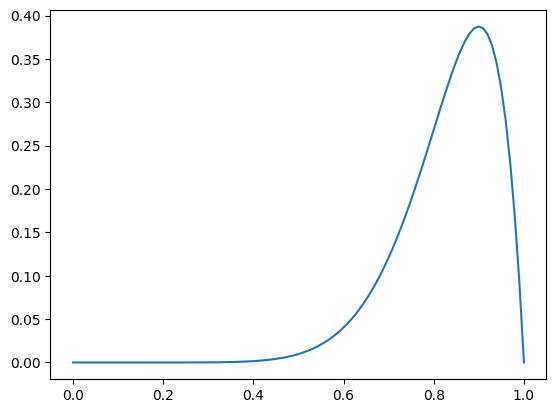

In [4]:
import matplotlib.pyplot as plt
theta = np.linspace(0, 1, 100)
probs = binom.pmf(k = 9, n = 10, p=theta)
plt.plot(theta, probs)

In [5]:
theta[np.argmax(probs)]

np.float64(0.8989898989898991)

In [6]:
np.log(10 ** 2) 

np.float64(4.605170185988092)

In [7]:
np.log(np.exp(10))

np.float64(10.0)

In [8]:
0.9 ** 10

0.3486784401000001

In [9]:
from scipy.stats import expon
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
# datos simulados de expon
l_real = 5
n = 1000
help(expon.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.expon_gen instance
    Random variates of given type.

    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : {None, int, `numpy.random.Generator`,
                    `numpy.random.RandomState`}, optional

        If `random_state` is None (or `np.random`), the
        `numpy.random.RandomState` singleton is used.
        If `random_state` is an int, a new ``RandomState`` instance is
        used, seeded with `random_state`.
        If `random_state` is already a ``Generator

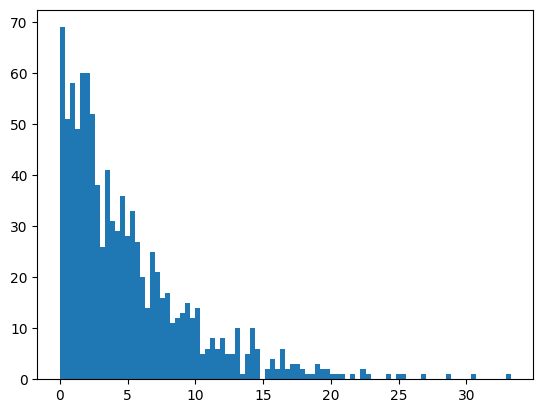

In [10]:
data = expon.rvs(scale=l_real, size=n)
plt.hist(data, bins=90);

In [11]:
# 1. fn de L y l(lambda)
# 2. derivar e igualar a 0, despejar para lambda*

# 1. fn de l(lambda)

# necesito la pdf de exponencial
def log_likelihood(param, x):
    joint_pdf = expon.pdf(x, scale=param)
    log_likelihood = np.sum(np.log(joint_pdf))
    # si vamos a usar minimize, necesitamos log_like negative
    neg_log_likelihood = -log_likelihood
    return neg_log_likelihood


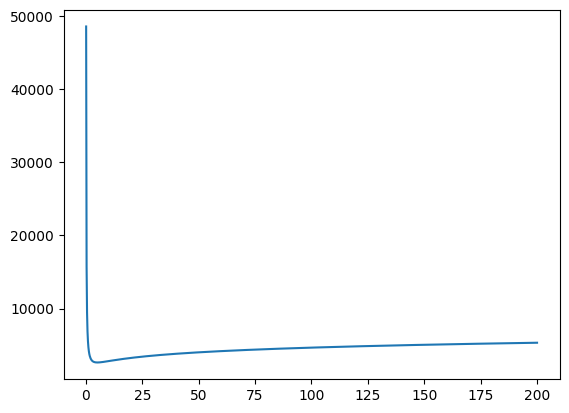

In [12]:
param = np.linspace(0.1, 200, 1000)
# list comprehension
ll = [log_likelihood(p, data) for p in param]
plt.plot(param, ll)

In [13]:
result = minimize(
    log_likelihood,
    x0=1, # initial guess
    args=data,
    method='Nelder-Mead'
)
l_hat = result.x

In [14]:
print(
    f'L hat: {l_hat}, L real: {l_real}'
)

L hat: [5.08427734], L real: 5


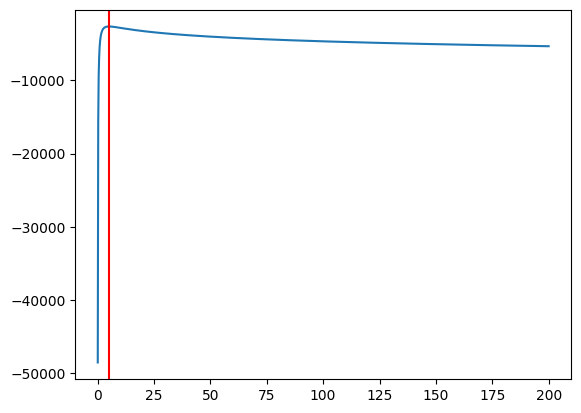

In [15]:
plt.plot(param, -np.array(ll));
plt.axvline(l_hat, color='red')

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Ordinary least squares

In [17]:
#%pip install scikit-learn

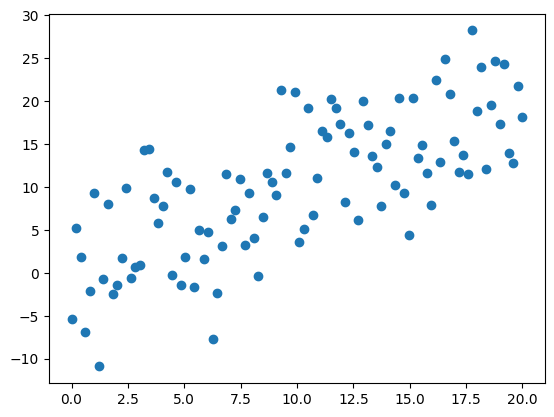

In [18]:
np.random.seed(123)
num_sample = 100
x = np.linspace(0, 20, num_sample)
# simular ruido gaussiano
sig = 5
b0_real = 0
b1_real = 1
epsilon = np.random.normal(0, sig, num_sample)

y = b0_real + b1_real * x + epsilon

plt.scatter(x, y)

In [19]:
x = x.reshape(-1, 1)
x.shape

(100, 1)

In [20]:
# crear instancia de modelo
model = LinearRegression()
model.fit(x, y)

LinearRegression()

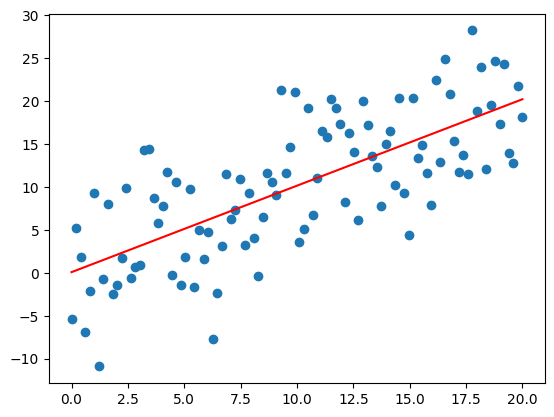

In [21]:
b0_fit = model.intercept_
b1_fit = model.coef_

y_fit = b0_fit + b1_fit * x

plt.scatter(x, y)
plt.plot(x, y_fit, color='red')

In [22]:
b1_fit

array([1.00701692])

In [23]:
import pandas as pd

np.random.seed(123)
num_sample = 100
x = np.linspace(0, 20, num_sample)
# simular ruido gaussiano
sig = 10
b0_real = 0
b1_real = 0.5
epsilon = np.random.normal(0, sig, num_sample)
epsilon = np.random.exponential(5, num_sample)

y = b0_real + b1_real * x + epsilon

def bootstrapping(datos):
    """
    :param datos: pandas dataframe
    :return integer: pendiente
    """

    # muestra aleatoria con reemplazo
    sample_data = datos.sample(frac=1, replace=True)
    X = sample_data[['x']]
    y = sample_data['y']
    model = LinearRegression()
    model.fit(X, y)
    b_hat = model.coef_[0]
    return b_hat


B = 3500
datos = pd.DataFrame({
    'x': x,
    'y': y
})

slopes = np.empty(B)

for i in range(B):
    slopes[i] = bootstrapping(datos)


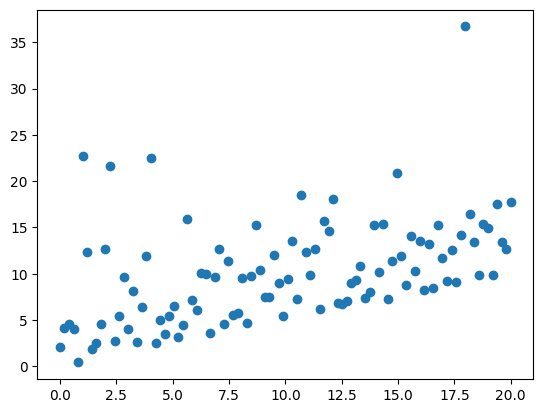

In [24]:
plt.scatter(x, y)

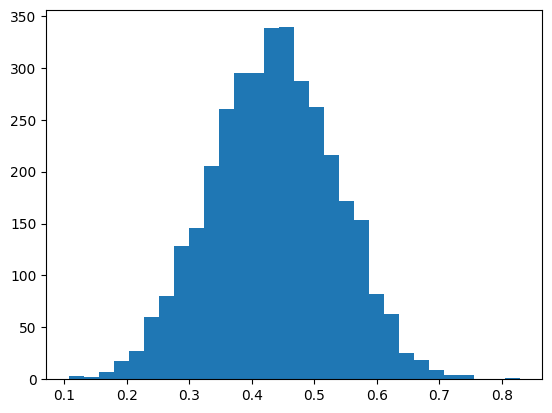

In [25]:
plt.hist(slopes, bins=30);

In [26]:
ci95 = np.percentile(slopes, [2.75, 97.5])
ci95

array([0.24521717, 0.62639574])

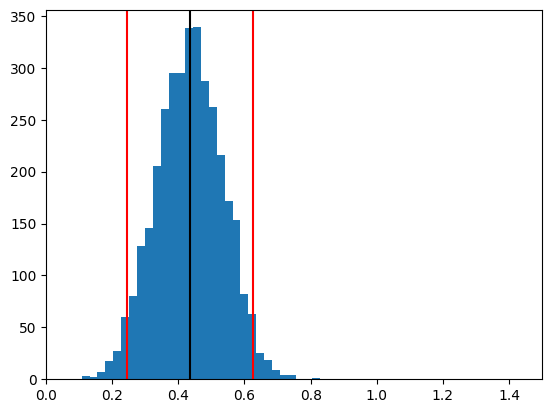

In [27]:
plt.hist(slopes, bins=30);
plt.xlim(0, 1.5)
plt.axvline(ci95[0], color='red')
plt.axvline(ci95[1], color='red')
plt.axvline(slopes.mean(), color='black')

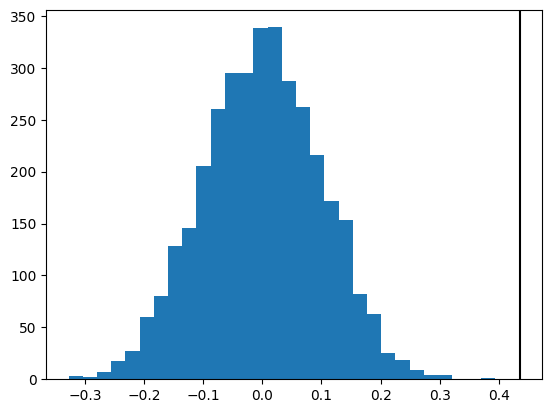

In [28]:
null_slopes = slopes - slopes.mean()
plt.hist(null_slopes, bins=30);
plt.axvline(slopes.mean(), color='black')

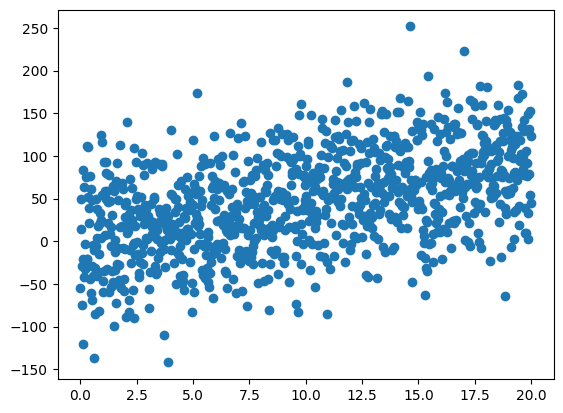

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(123)
num_sample = 1000
x = np.linspace(0, 20, num_sample)
# simular ruido gaussiano
sig = 50
b0_real = 0
b1_real = 5
epsilon = np.random.normal(0, sig, num_sample)

y = b0_real + b1_real * x + epsilon
plt.scatter(x, y)

In [30]:
X = x.reshape(-1,1)
# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# entrenar en el conjunto de prueba
model = LinearRegression()
model.fit(X_train, y_train)

# evaluar modelo
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
print(f'Puntuacion R^2: {test_score}')

Puntuacion R^2: 0.2852286875964327


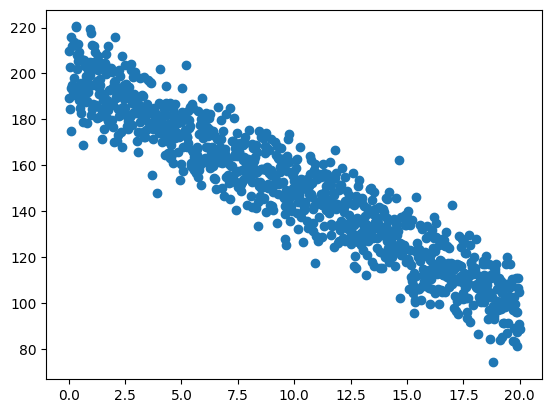

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(123)
num_sample = 1000
x = np.linspace(0, 20, num_sample)
# simular ruido gaussiano
sig = 10
b0_real = 200
b1_real = -5
epsilon = np.random.normal(0, sig, num_sample)

y = b0_real + b1_real * x + epsilon
plt.scatter(x, y)

In [62]:
X = x.reshape(-1,1)
# dividir en train y test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# entrenar en el conjunto de prueba
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-5.08131958])

In [71]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [101]:
x_new = np.array([5, 15, 55])
x_new = x_new.reshape(-1, 1) # shape (3, 1)

n = X_train.size
Brep = 1000
boot_rep = np.empty((x_new.size, Brep))

# bootstapping

for i in range(Brep):
    # obtener una lista de indices aleatorios de 0 a n, de tamaño n, con reemplazo
    idx_sample = np.random.choice(n, size=n, replace=True)
    # usar indices para obtener remuestras
    X_boot = X_train[idx_sample]
    y_boot = y_train[idx_sample]
    # correr modelo con remuestras
    boot_model = LinearRegression()
    boot_model.fit(X_boot, y_boot)
    # predicho para x_new
    boot_predicted = boot_model.predict(x_new)
    boot_rep[:, i] = boot_predicted
    

In [102]:
lim_inf = np.percentile(boot_rep, 2.5, axis=1)
lim_sup = np.percentile(boot_rep, 97.5, axis=1)

# original pred
y_pred = model.predict(x_new)

In [90]:
x_new.flatten().shape

(3,)

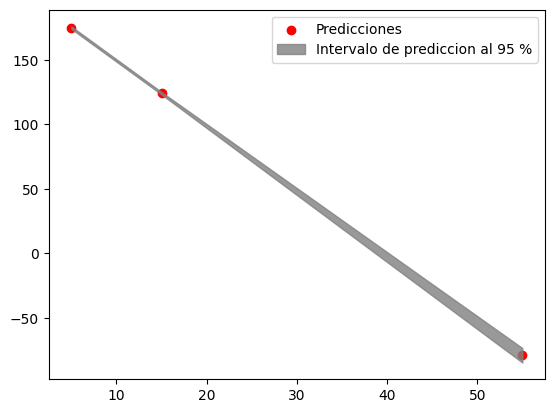

In [103]:

plt.scatter(
    x_new.flatten(),
    y_pred,
    color='red',
    label='Predicciones'
)
plt.fill_between(
    x_new.flatten(),
    lim_inf, 
    lim_sup,
    color='gray',
    alpha=0.8,
    label='Intervalo de prediccion al 95 %'
)
plt.legend()

In [100]:
# Imprimir los intervalos de predicción para x_sim
for i in range(len(x_new)):
    print(
        f'Predicción en x = {x_new[i][0]:.2f}: {y_pred[i]:.2f} '
        f'(Intervalo al 95%: [{lim_inf[i]:.2f}, {lim_sup[i]:.2f}])'
    )


Predicción en x = 5.00: 174.91 (Intervalo al 95%: [174.01, 175.93])
Predicción en x = 15.00: 124.10 (Intervalo al 95%: [123.14, 125.03])
Predicción en x = 25.00: 73.29 (Intervalo al 95%: [71.25, 75.31])
